<a href="https://colab.research.google.com/github/5H1V1M/CodeAlpha_Tasks/blob/main/SalesPrediction(Task).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install pydotplus

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
import pydotplus
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv(r"/content/Advertising.csv")

In [4]:
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [5]:
df.tail()

,Unnamed: 0,TV,Radio,Newspaper,Sales
195,196,38.2,3.7,13.8,7.6
196,197,94.2,4.9,8.1,9.7
197,198,177.0,9.3,6.4,12.8
198,199,283.6,42.0,66.2,25.5
199,200,232.1,8.6,8.7,13.4


In [6]:
df.shape

(200, 5)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [8]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [9]:
df.isnull().sum()

,0
Unnamed: 0,0
TV,0
Radio,0
Newspaper,0
Sales,0


In [10]:
df.duplicated().sum()

0

In [19]:
del df['Unnamed: 0']

In [23]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [24]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [25]:
x = df.drop('Sales', axis = 1)
y = df['Sales']

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size = 0.2, random_state = 42)

In [27]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [28]:
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


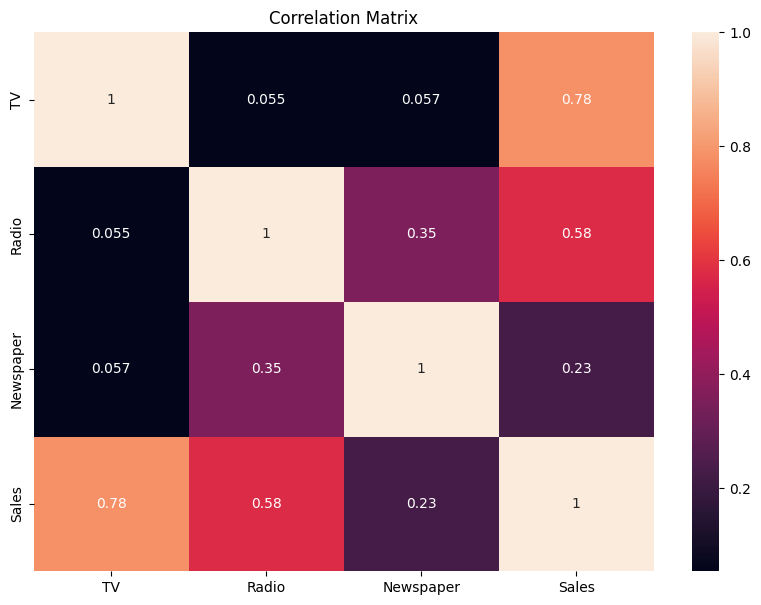

In [29]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot = True)
plt.title('Correlation Matrix')
plt.show()

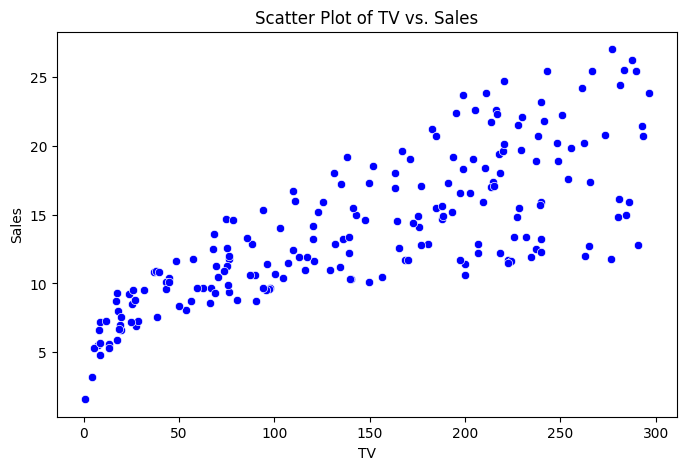

In [30]:
plt.figure(figsize=(8,5))
sns.scatterplot(x = df['TV'], y = df['Sales'], color='blue')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Scatter Plot of TV vs. Sales')

plt.show()


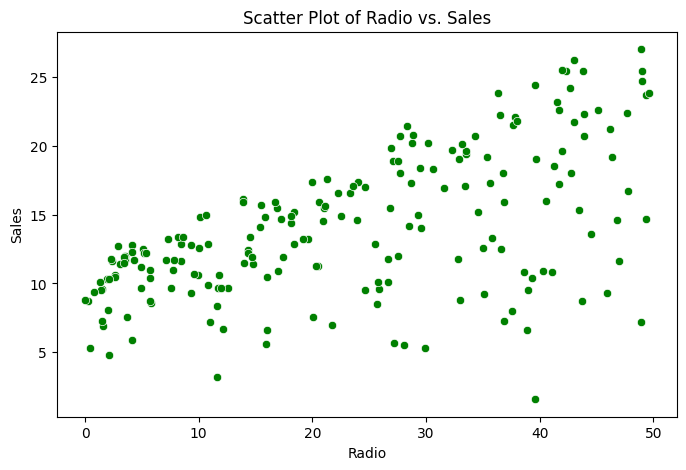

In [33]:
plt.figure(figsize=(8,5))
sns.scatterplot(x = df['Radio'], y = df['Sales'], color='green')
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.title('Scatter Plot of Radio vs. Sales')

plt.show()


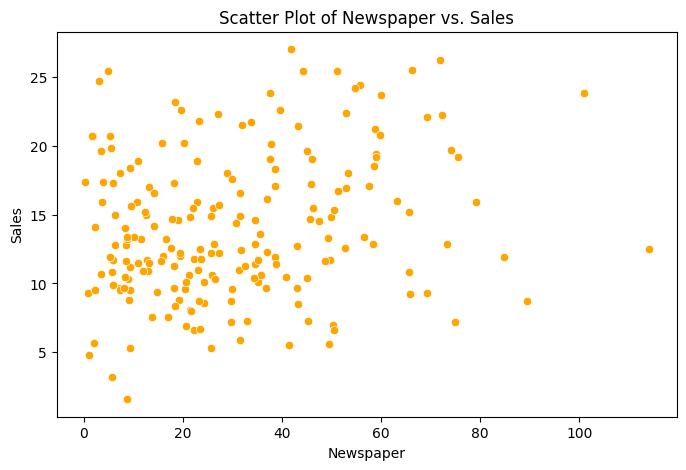

In [32]:
plt.figure(figsize=(8,5))
sns.scatterplot(x = df['Newspaper'], y = df['Sales'], color='orange')
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.title('Scatter Plot of Newspaper vs. Sales')

plt.show()


In [42]:
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [43]:
y_pred = model.predict(x_test)

In [44]:
y_test

,Sales
95,16.9
15,22.4
30,21.4
158,7.3
128,24.7
...,...
59,18.4
171,14.5
131,12.7
17,24.4


In [46]:
model_r2_score = r2_score(y_test, y_pred)
model_mse = mean_squared_error(y_test, y_pred)
model_rmse = mean_squared_error(y_test, y_pred)
model_mae = mean_absolute_error(y_test, y_pred)

In [48]:
print(f"The r2_score using Linear Regression : {model_r2_score:.2f}")
print(f"The MSE using Linear Regression : {model_mse:.2f}")
print(f"The RMSE using Linear Regression : {model_rmse:.2f}")
print(f"The MAE Error using Linear Regression : {model_mae:.2f}")

The r2_score using Linear Regression : 0.88
The MSE using Linear Regression : 3.34
The RMSE using Linear Regression : 3.34
The MAE Error using Linear Regression : 1.48


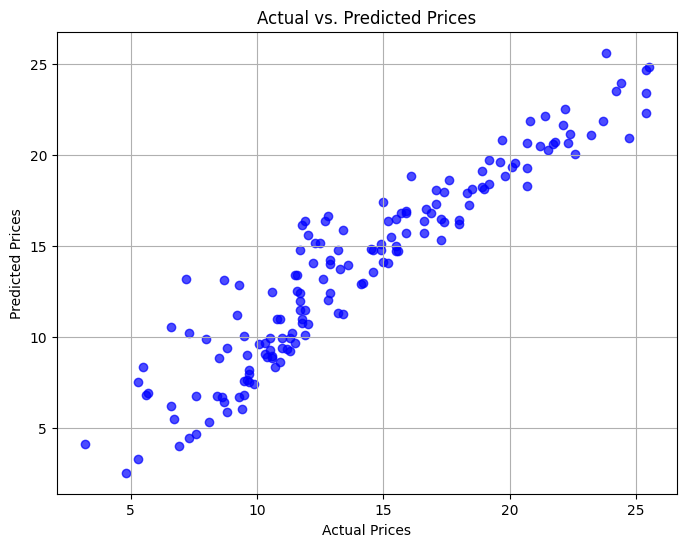

In [63]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.7)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs. Predicted Prices')
plt.grid(True)
plt.show()

In [64]:
dtr = DecisionTreeRegressor()
dtr.fit(x_train, y_train)

DecisionTreeRegressor()

In [65]:
y_pred = dtr.predict(x_test)

In [66]:
dtr_r2_score = r2_score(y_test, y_pred)
dtr_mse = mean_squared_error(y_test, y_pred)
dtr_rmse = mean_squared_error(y_test, y_pred)
dtr_mae = mean_absolute_error(y_test, y_pred)

In [67]:
print(f"The r2_score using Decision Tree Regressor : {dtr_r2_score:.2f}")
print(f"The MSE using Decision Tree Regressor : {dtr_mse:.2f}")
print(f"The RMSE using Decision Tree Regressor : {dtr_rmse:.2f}")
print(f"The MAE Error using Decision Tree Regressor : {dtr_mae:.2f}")

The r2_score using Decision Tree Regressor : 0.81
The MSE using Decision Tree Regressor : 5.22
The RMSE using Decision Tree Regressor : 5.22
The MAE Error using Decision Tree Regressor : 1.54


In [68]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=42)

In [69]:
y_pred = rf.predict(x_test)

In [70]:
rf_r2_score = r2_score(y_test, y_pred)
rf_mse = mean_squared_error(y_test, y_pred)
rf_rmse = mean_squared_error(y_test, y_pred)
rf_mae = mean_absolute_error(y_test, y_pred)

In [71]:
print(f"The r2_score using Random Forest Regressor : {rf_r2_score:.2f}")
print(f"The MSE using Random Forest Regressor : {rf_mse:.2f}")
print(f"The RMSE using Random Forest Regressor : {rf_rmse:.2f}")
print(f"The MAE Error using Random Forest Regressor : {rf_mae:.2f}")

The r2_score using Random Forest Regressor : 0.95
The MSE using Random Forest Regressor : 1.26
The RMSE using Random Forest Regressor : 1.26
The MAE Error using Random Forest Regressor : 0.91


In [72]:
svr = SVR(kernel='linear', C=1)
svr.fit(x_train, y_train)

SVR(C=1, kernel='linear')

In [73]:
svr_r2_score = r2_score(y_test, y_pred)
svr_mse = mean_squared_error(y_test, y_pred)
svr_rmse = mean_squared_error(y_test, y_pred)
svr_mae = mean_absolute_error(y_test, y_pred)

In [74]:
print(f"The r2_score using Support Vector Machine: {svr_r2_score:.2f}")
print(f"The MSE using Support Vector Machine: {svr_mse:.2f}")
print(f"The RMSE using Support Vector Machine: {svr_rmse:.2f}")
print(f"The MAE Error using Support Vector Machine : {svr_mae:.2f}")

The r2_score using Support Vector Machine: 0.95
The MSE using Support Vector Machine: 1.26
The RMSE using Support Vector Machine: 1.26
The MAE Error using Support Vector Machine : 0.91


In [77]:
metric_results= {'Model': ['Linear Regression','Decision Tree','Random Forest','Support Vector Machine'],
                 'R2 Square': [model_r2_score, dtr_r2_score, rf_r2_score, svr_r2_score],
                  'MSE':[model_mse, dtr_mse, rf_mse, svr_mse],
                  'RMSE':[model_rmse, dtr_rmse, rf_rmse, svr_rmse],
                  'MAE':[model_mae, dtr_mae, rf_mae, svr_mae]}
metrics= pd.DataFrame(metric_results)
metrics

,Model,R2 Square,MSE,RMSE,MAE
0,Linear Regression,0.875839,3.335978,3.335978,1.475796
1,Decision Tree,0.805864,5.216063,5.216063,1.538125
2,Random Forest,0.953048,1.261522,1.261522,0.906800
3,Support Vector Machine,0.953048,1.261522,1.261522,0.906800
